In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]=""

# load model

In [3]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_4/models/B5R2b5_5FP_1FC_fold4_1.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

In [4]:
# validation
import pandas as pd
base_dir  = '/media/tohn/SSD/Images/Image4/'
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/Validationdf_fold4.csv')
validation_dir = os.path.join(base_dir, 'validation')

#Train
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/Traindf_fold4.csv')
base_dir0 = '/media/tohn/SSD/Images/Image4/'
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

# Select Data

In [5]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Validationdf_fold4.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# a = df01[df01['Case'].between(1, 10)]
# dataframe = df01[df01['Abs Position']!='P8']
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(658, 25)
(658, 25)
Normal:  (430, 25)
Abnormal:  (228, 25)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,...,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,FileName,filename
0,0,0,298,298,3,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,130.0,168.0,546.0,412.0,0.136704,0.186722,0.571161,0.458167,AB01 P2 C003.JPG,AB01 P2 C003.JPG
1,1,1,299,299,3,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,206.0,107.0,629.0,536.0,0.205357,0.118993,0.626786,0.595618,AB01 P3-1 C003.JPG,AB01 P3-1 C003.JPG
2,2,2,300,300,3,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,220.0,117.0,706.0,475.0,0.218085,0.130945,0.698582,0.527888,AB01 P1 C003.JPG,AB01 P1 C003.JPG
3,3,3,301,301,3,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,14.0,178.0,527.0,632.0,0.015009,0.198674,0.551595,0.703187,AB01 P5-1 C003.JPG,AB01 P5-1 C003.JPG
4,4,4,302,302,3,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,194.0,101.0,541.0,630.0,0.198147,0.113258,0.549816,0.701010,AB02 P1 C003.JPG,AB02 P1 C003.JPG


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1010 non-null   int64  
 1   Case           1010 non-null   int64  
 2   Abs Position   1010 non-null   object 
 3   Sub Position   1010 non-null   object 
 4   Class          1010 non-null   object 
 5   Sub_class      1010 non-null   object 
 6   Path Full      1010 non-null   object 
 7   Path Crop      1010 non-null   object 
 8   Views          1010 non-null   object 
 9   fold           1010 non-null   int64  
 10  tagName        1010 non-null   object 
 11  originalImage  293 non-null    object 
 12  left           293 non-null    float64
 13  top            293 non-null    float64
 14  width          293 non-null    float64
 15  height         293 non-null    float64
 16  Rleft          293 non-null    float64
 17  Rtop           293 non-null    float64
 18  Rwidth  

In [6]:
batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'Path Crop',
        y_col = 'Views',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 658 validated image filenames belonging to 5 classes.
{0: 'FP-A', 1: 'FP-B', 2: 'FP-C', 3: 'FP-D', 4: 'FP-E'}


# Prediction

In [7]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

In [8]:
dataframe.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,...,width,height,Rleft,Rtop,Rwidth,Rheight,FileName,filename,category,Prob
0,0,0,298,298,3,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,546.0,412.0,0.136704,0.186722,0.571161,0.458167,AB01 P2 C003.JPG,AB01 P2 C003.JPG,FP-A,1.000000
1,1,1,299,299,3,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,629.0,536.0,0.205357,0.118993,0.626786,0.595618,AB01 P3-1 C003.JPG,AB01 P3-1 C003.JPG,FP-B,1.000000
2,2,2,300,300,3,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,706.0,475.0,0.218085,0.130945,0.698582,0.527888,AB01 P1 C003.JPG,AB01 P1 C003.JPG,FP-A,0.998227
3,3,3,301,301,3,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,527.0,632.0,0.015009,0.198674,0.551595,0.703187,AB01 P5-1 C003.JPG,AB01 P5-1 C003.JPG,FP-C,1.000000
4,4,4,302,302,3,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,541.0,630.0,0.198147,0.113258,0.549816,0.701010,AB02 P1 C003.JPG,AB02 P1 C003.JPG,FP-C,0.826753


# Visualization

In [11]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Views'])
print('Actual : ',len(classe))
print(classe)

Predicted :  5
{'FP-D', 'FP-E', 'FP-A', 'FP-C', 'FP-B'}
Actual :  5
{'FP-D', 'FP-E', 'FP-A', 'FP-C', 'FP-B'}


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Views'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 93.00911854103343%
              precision    recall  f1-score   support

        FP-A       0.95      0.90      0.92       137
        FP-B       0.93      0.94      0.94       197
        FP-C       0.92      0.93      0.93       190
        FP-D       0.90      0.95      0.92        99
        FP-E       0.97      0.91      0.94        35

    accuracy                           0.93       658
   macro avg       0.93      0.93      0.93       658
weighted avg       0.93      0.93      0.93       658



### Confusion matrix

Text(0.5, 21.5, 'Predicted label')

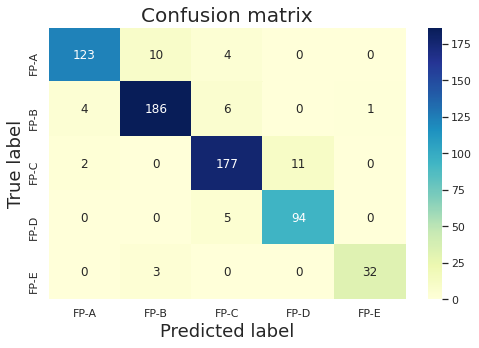

In [13]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)